# Decision Tree Exercises

### Exercises

Use the titanic data:

- 1. What is your baseline prediction? 
- 2. What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). 
- 3. When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [2]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import acquire

In [3]:
df = acquire.get_titanic_data()

In [4]:
df

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1
887,887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0
889,889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


In [5]:
df.value_counts()

Unnamed: 0  passenger_id  survived  pclass  sex     age   sibsp  parch  fare      embarked  class   deck  embark_town  alone
1           1             1         1       female  38.0  1      0      71.2833   C         First   C     Cherbourg    0        1
571         571           1         1       female  53.0  2      0      51.4792   S         First   C     Southampton  0        1
577         577           1         1       female  39.0  1      0      55.9000   S         First   E     Southampton  0        1
581         581           1         1       female  39.0  1      1      110.8833  C         First   C     Cherbourg    0        1
583         583           0         1       male    36.0  0      0      40.1250   C         First   A     Cherbourg    1        1
                                                                                                                               ..
325         325           1         1       female  36.0  0      0      135.6333  C         Fir

In [6]:
# Which label appears most frequently in our dataset?
df.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

In [7]:
# Baseline prediction will be the most prevalent which is 0 for survived (in other words, did not survive)
df['baseline'] = 0
df

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone,baseline
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0,0
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1,0
3,3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0,0
4,4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1,0
887,887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1,0
888,888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0,0
889,889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1,0


In [8]:
# Baseline accuracy:

baseline_accuracy = (df.survived == df.baseline).mean()

print(f'baseline accuracy: {baseline_accuracy:.2%}')

baseline accuracy: 61.62%


In [9]:
#Replace string values in columns to prepare data for model

df.replace({'sex':{'male':1, 'female':0}}, inplace=True)  #male is 1, female is 0

df.replace({'class':{'First':1, 'Second':2, 'Third':3}}, inplace=True) #First class is 2, Second is 2, and Third is 3

df.replace({'deck':{'A':1, 'B':2, 'C':3}}, inplace=True) #NaN is 0, A is 1, B is 2, C is 3

df.replace({'embark_town':{'Cherbourg':1, 'Southampton':2, 'Queenstown':3}}, inplace=True) #First class is 2, Second is 2, and Third is 3

df.replace({'embarked':{'C':1, 'S':2, 'Q':3}}, inplace=True) #First class is 2, Second is 2, and Third is 3






In [10]:
df

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone,baseline
0,0,0,0,3,1,22.0,1,0,7.2500,2.0,3,NaN,2.0,0,0
1,1,1,1,1,0,38.0,1,0,71.2833,1.0,1,3,1.0,0,0
2,2,2,1,3,0,26.0,0,0,7.9250,2.0,3,NaN,2.0,1,0
3,3,3,1,1,0,35.0,1,0,53.1000,2.0,1,3,2.0,0,0
4,4,4,0,3,1,35.0,0,0,8.0500,2.0,3,NaN,2.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,886,0,2,1,27.0,0,0,13.0000,2.0,2,NaN,2.0,1,0
887,887,887,1,1,0,19.0,0,0,30.0000,2.0,1,2,2.0,1,0
888,888,888,0,3,0,NaN,1,2,23.4500,2.0,3,NaN,2.0,0,0
889,889,889,1,1,1,26.0,0,0,30.0000,1.0,1,3,1.0,1,0


In [11]:
#drop Unnamed column
df = df.drop(columns='Unnamed: 0')

In [12]:
# drop rows where embarked/embark town are null values
df = df[~df.embark_town.isnull()]

In [13]:
# drop rows where age is null values
df = df[~df.age.isnull()]

#Or we can impute using the median age because it looks like there's nothing no age folks are way different
#df.age = df.age.fillna(value=df.age.median())
#print(df.age.median())

In [14]:
# drop the deck column
df = df.drop(columns='deck')

In [15]:
# encode embarked using dummy columns
titanic_dummies = pd.get_dummies(df.embark_town, drop_first=True)

In [16]:
df

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,baseline
0,0,0,3,1,22.0,1,0,7.2500,2.0,3,2.0,0,0
1,1,1,1,0,38.0,1,0,71.2833,1.0,1,1.0,0,0
2,2,1,3,0,26.0,0,0,7.9250,2.0,3,2.0,1,0
3,3,1,1,0,35.0,1,0,53.1000,2.0,1,2.0,0,0
4,4,0,3,1,35.0,0,0,8.0500,2.0,3,2.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,885,0,3,0,39.0,0,5,29.1250,3.0,3,3.0,0,0
886,886,0,2,1,27.0,0,0,13.0000,2.0,2,2.0,1,0
887,887,1,1,0,19.0,0,0,30.0000,2.0,1,2.0,1,0
889,889,1,1,1,26.0,0,0,30.0000,1.0,1,1.0,1,0


In [17]:
#How many nulls are in our dataset?
df.isna().sum()

passenger_id    0
survived        0
pclass          0
sex             0
age             0
sibsp           0
parch           0
fare            0
embarked        0
class           0
embark_town     0
alone           0
baseline        0
dtype: int64

In [18]:
from sklearn.model_selection import train_test_split

def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [19]:
# split into train, validate, test
train, validate, test = train_validate_test_split(df, target='survived', seed=123)

# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

In [20]:
train.shape

(398, 13)

In [21]:
X_train

,passenger_id,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,baseline
450,450,2,1,36.0,1,2,27.7500,2.0,2,2.0,0,0
543,543,2,1,32.0,1,0,26.0000,2.0,2,2.0,0,0
157,157,3,1,30.0,0,0,8.0500,2.0,3,2.0,1,0
462,462,1,1,47.0,0,0,38.5000,2.0,1,2.0,1,0
397,397,2,1,46.0,0,0,26.0000,2.0,2,2.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
820,820,1,0,52.0,1,1,93.5000,2.0,1,2.0,0,0
673,673,2,1,31.0,0,0,13.0000,2.0,2,2.0,1,0
310,310,1,0,24.0,0,0,83.1583,1.0,1,1.0,1,0
72,72,2,1,21.0,0,0,73.5000,2.0,2,2.0,1,0


In [ ]:
# The mode is a great baseline
baseline = y_train.mode()

#
matches_baseline_prediction = y_train == 0

baseline_accuracy = matches_baseline_prediction.mean()
print("Baseline accuracy: {round(baseline_accuracy, 2)}")

In [ ]:
#Train the model

#Create the Decision Tree object with desired hyper-parameters.

clf = DecisionTreeClassifier(max_depth=3, random_state=123)

In [ ]:
#Fit the random forest algorithm to the training data.

# model.fit(X, y)

clf = clf.fit(X_train, y_train)

In [ ]:
#Graphviz: Visualize the Decision Tree

import graphviz
from graphviz import Graph

dot_data = export_graphviz(clf, feature_names= X_train.columns, rounded=True, filled=True, out_file=None)
graph = graphviz.Source(dot_data) 

graph.render('titanic_decision_tree', view=True)

In [ ]:
#Make Predictions on train obeservations

y_pred = clf.predict(X_train)
y_pred[0:5]

In [ ]:
#Estimate the probability using the training data

y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:5]

In [ ]:
#Evaluate the Model

#Compute Accuracy

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

In [ ]:
#Create a confusion matrix

confusion_matrix(y_train, y_pred)

In [ ]:
y_train.value_counts()

In [ ]:
#Add labels

import pandas as pd

labels = sorted(y_train.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

In [ ]:
#Print classification report

print(classification_report(y_train, y_pred))

In [ ]:
#Evaluate the Model with our Validate dataset

#Compute the accuracy of the model when run on the validate data

print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clf.score(X_validate, y_validate)))

In [ ]:
# And since accuracy isn't everything

# Produce y_predictions that come from the X_validate
y_pred = clf.predict(X_validate)

# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_validate, y_pred))

In [ ]:
#Train the model with a max_depth of 2 to compare values

#Create the Decision Tree object with desired hyper-parameters.

clf = DecisionTreeClassifier(max_depth=2, random_state=123)

In [ ]:
clf = clf.fit(X_train, y_train)

In [ ]:
dot_data = export_graphviz(clf, feature_names= X_train.columns, rounded=True, filled=True, out_file=None)
graph = graphviz.Source(dot_data) 

graph.render('titanic_decision_tree', view=True)

In [ ]:
y_pred = clf.predict(X_train)
y_pred[0:5]

In [ ]:
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:5]

In [ ]:
y_train.value_counts()

In [ ]:
labels = sorted(y_train.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

In [ ]:
print(classification_report(y_train, y_pred))

In [ ]:

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

In [ ]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clf.score(X_validate, y_validate)))

In [ ]:
# Produce y_predictions that come from the X_validate
y_pred = clf.predict(X_validate)

# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_validate, y_pred))

In [ ]:
#Train the model with a max_depth of 4 to compare values

#Create the Decision Tree object with desired hyper-parameters.

clf = DecisionTreeClassifier(max_depth=4, random_state=123)

In [ ]:
clf = clf.fit(X_train, y_train)

In [ ]:
dot_data = export_graphviz(clf, feature_names= X_train.columns, rounded=True, filled=True, out_file=None)
graph = graphviz.Source(dot_data) 

graph.render('titanic_decision_tree', view=True)

In [ ]:
y_pred = clf.predict(X_train)
y_pred[0:5]

In [ ]:
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:5]

In [ ]:

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

In [ ]:
confusion_matrix(y_train, y_pred)

In [ ]:
y_train.value_counts()

In [ ]:
labels = sorted(y_train.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

In [ ]:
print(classification_report(y_train, y_pred))

In [ ]:
#print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
#     .format(clf.score(X_validate, y_validate)))()

In [ ]:
# Produce y_predictions that come from the X_validate
y_pred = clf.predict(X_validate)

# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_validate, y_pred))

# Random Forest Exercises

#### Continue working in your model file with titanic data to do the following:

- Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

In [ ]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import acquire

# read Titanic data using acquire.py
df = acquire.get_titanic_data()



df.head()

In [ ]:
#Clean up columns
df.replace({'sex':{'male':1, 'female':0}}, inplace=True)  #male is 1, female is 0
df = df.set_index("passenger_id")
df = df.drop(columns=["Unnamed: 0", "embarked"])
df

In [ ]:
# Drop deck because there are far too many nulls
df = df.drop(columns=["deck"])
df

In [ ]:
# Let's fill embark_town with the most common observation
embark_town_fill = df.embark_town.mode()

df.embark_town = df.embark_town.fillna(value=embark_town_fill)
df

In [ ]:
#Impute using the median age to fill nulls
df.age = df.age.fillna(value=df.age.median())

In [ ]:
#Replace string values in the class column to be integers

df.replace({'class':{'First':1, 'Second':2, 'Third':3}}, inplace=True) #First class is 2, Second is 2, and Third is 3

In [ ]:
# Time to encode the encodeable!
dummy_df = pd.get_dummies(df[['sex','embark_town']], dummy_na=False, drop_first=[True, True])

# Drop the original columns we encoded
df = df.drop(columns=["sex", "embark_town"])

# Stitch the df and the dummy_df together again
df = pd.concat([df, dummy_df], axis=1)
df.head()

In [ ]:
from sklearn.model_selection import train_test_split

def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [ ]:
# split into train, validate, test
train, validate, test = train_validate_test_split(df, target='survived', seed=123)

# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

In [ ]:
# Create the Random Forest object with desired hyper-parameters.

rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=1,
                            n_estimators=100,
                            max_depth=10, 
                            random_state=123)

In [ ]:
#Fit the random forest algorithm to the training data.

rf.fit(X_train, y_train)

In [ ]:
#RandomForestClassifier(max_depth=3, min_samples_leaf=3, random_state=123)

In [ ]:
# Evaluate importance, or weight, of each feature.

print(rf.feature_importances_)

In [ ]:
# Make Predictions
y_pred = rf.predict(X_train)

In [ ]:
# Estimate Probability

y_pred_proba = rf.predict_proba(X_train)

In [ ]:
# Evaluate Model

#Compute the Accuracy

print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

In [ ]:
# Create a confusion matrix

print(confusion_matrix(y_train, y_pred))

In [ ]:
#Create a classificaiton report

print(classification_report(y_train, y_pred))

In [ ]:
#Validate Model

#Evaluate on Out-of-Sample data

print('Accuracy of random forest classifier on validate set: {:.2f}'
     .format(rf.score(X_validate, y_validate)))


In [ ]:
#  Increasing your min_samples_leaf and decreasing max_depth to modify model

rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=2,
                            n_estimators=100,
                            max_depth=5, 
                            random_state=123)

In [ ]:
#Fit the random forest algorithm to the training data.

rf.fit(X_train, y_train)

In [ ]:
# Evaluate importance, or weight, of each feature.

print(rf.feature_importances_)

In [ ]:
# Make Predictions
y_pred = rf.predict(X_train)

In [ ]:
# Estimate Probability

y_pred_proba = rf.predict_proba(X_train)

In [ ]:
# Evaluate Model

#Compute the Accuracy

print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

In [ ]:
#Create a classificaiton report

print(classification_report(y_train, y_pred))

In [ ]:
#Validate Model

#Evaluate on Out-of-Sample data

print('Accuracy of random forest classifier on validate set: {:.2f}'
     .format(rf.score(X_validate, y_validate)))



In [ ]:
#  Increasing your min_samples_leaf and decreasing max_depth to modify model

rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=123)

In [ ]:
#Fit the random forest algorithm to the training data.

rf.fit(X_train, y_train)

In [ ]:
# Evaluate importance, or weight, of each feature.

print(rf.feature_importances_)

In [ ]:
# Make Predictions
y_pred = rf.predict(X_train)

In [ ]:
# Estimate Probability

y_pred_proba = rf.predict_proba(X_train)

In [ ]:
# Evaluate Model

#Compute the Accuracy

print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

In [ ]:
#Create a classification report

print(classification_report(y_train, y_pred))

In [ ]:
#Validate Model

#Evaluate on Out-of-Sample data

print('Accuracy of random forest classifier on validate set: {:.2f}'
     .format(rf.score(X_validate, y_validate)))




In [ ]:
#Increasing min_samples_per_leaf, decreasing max_depth

# Let's get loopy, so we can compare in-sample to out-of-sample
metrics = []
max_depth = 20

for i in range(2, max_depth):
    # Make the model
    depth = max_depth - i
    n_samples = i
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

In [ ]:
#What if we increase both min_samples_per_leaf and max_depth¶

# Let's get loopy, so we can compare in-sample to out-of-sample
metrics = []
max_depth = 20

for i in range(2, max_depth):
    # Make the model
    depth = i
    n_samples = i
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

In [ ]:
sns.scatterplot(x="max_depth", y="difference", data=df)

In [ ]:
#What about a fixed depth and increasing min_samples_leaf

# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []
max_depth = 50

for i in range(2, max_depth):
    # Make the model
    depth = 10
    n_samples = i
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

# KNN Lesson Exercises

#### 1. Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

In [22]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



#### Create the KNN Object

In [23]:
# weights = ['uniform', 'density']
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

#### Fit the model to the training data.

In [24]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

#### Make Predictions


In [25]:
y_pred = knn.predict(X_train)

#### Estimate the probability using the training data.

In [26]:
y_pred_proba = knn.predict_proba(X_train)

#### Evaluate Model & Compute the Accuracy

In [27]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.72


In [28]:
#### Create a confusion matrix

In [29]:
print(confusion_matrix(y_train, y_pred))

[[196  41]
 [ 72  89]]


#### Create a classificaiton report

In [30]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.83      0.78       237
           1       0.68      0.55      0.61       161

    accuracy                           0.72       398
   macro avg       0.71      0.69      0.69       398
weighted avg       0.71      0.72      0.71       398



Evaluate on Out-of-Sample data

Compute the accuracy of the model when run on the validate dataset.

#### Evaluate on Out-of-Sample data

- Compute the accuracy of the model when run on the validate dataset.

In [31]:
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn.score(X_validate, y_validate)))

Accuracy of KNN classifier on test set: 0.61


#### Visualize the Model

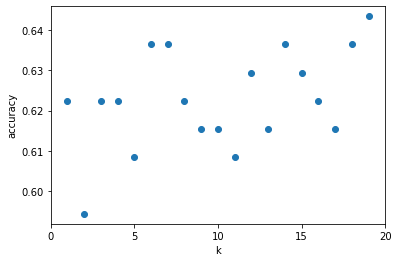

In [32]:
import matplotlib.pyplot as plt
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])
plt.show()

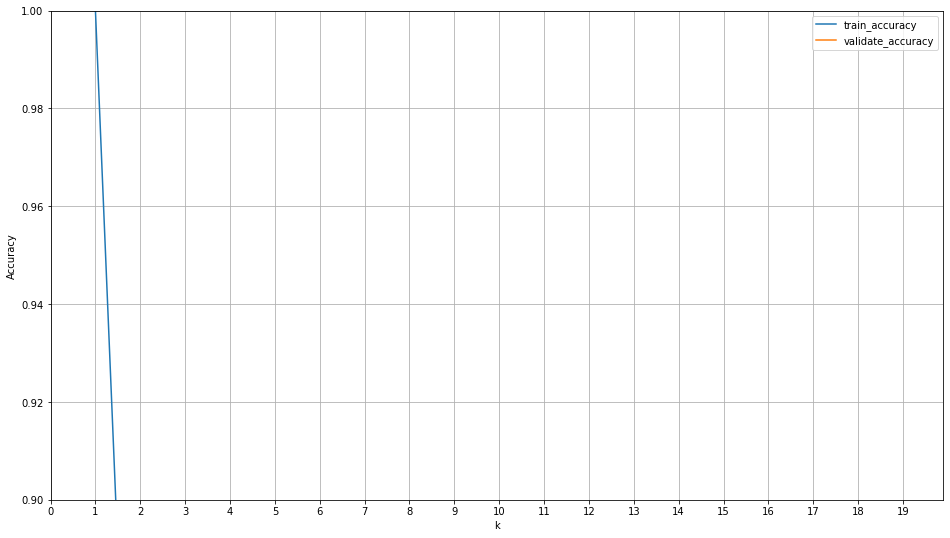

In [33]:
metrics = []

# loop through different values of k
for k in range(1, 20):
            
    # define the thing
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # fit the thing (remmeber only fit on training data)
    knn.fit(X_train, y_train)
    
    # use the thing (calculate accuracy)
    train_accuracy = knn.score(X_train, y_train)
    validate_accuracy = knn.score(X_validate, y_validate)
    
    output = {
        "k": k,
        "train_accuracy": train_accuracy,
        "validate_accuracy": validate_accuracy
    }
    
    metrics.append(output)

# make a dataframe
results = pd.DataFrame(metrics)

# plot the data
results.set_index('k').plot(figsize = (16,9))
plt.ylim(0.90, 1)
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,20,1))
plt.grid()

#### Setting K to 10

In [34]:
# weights = ['uniform', 'density']
knn = KNeighborsClassifier(n_neighbors=10, weights='uniform')

In [35]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [36]:
y_pred = knn.predict(X_train)

In [47]:
y_pred_proba = knn.predict_proba(X_train)

In [38]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.69


In [41]:
print(confusion_matrix(y_train, y_pred))

[[212  25]
 [ 97  64]]


In [51]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.89      0.78       237
           1       0.72      0.40      0.51       161

    accuracy                           0.69       398
   macro avg       0.70      0.65      0.64       398
weighted avg       0.70      0.69      0.67       398



In [43]:
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn.score(X_validate, y_validate)))

Accuracy of KNN classifier on test set: 0.65


#### Setting K to 20

In [44]:
# weights = ['uniform', 'density']
knn = KNeighborsClassifier(n_neighbors=10, weights='uniform')

In [45]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [46]:
y_pred = knn.predict(X_train)

In [48]:
y_pred_proba = knn.predict_proba(X_train)

In [49]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.69


In [50]:
print(confusion_matrix(y_train, y_pred))

[[212  25]
 [ 97  64]]


In [52]:
print(confusion_matrix(y_train, y_pred))

[[212  25]
 [ 97  64]]


# Work on Modeling Telco Data

In [ ]:
import acquire_telco

In [ ]:
df_telco = acquire_telco.get_telco_data()

In [ ]:
df_telco.head()

In [ ]:
#df_telco.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
df_telco.drop(columns=['customer_id'], inplace=True)

In [ ]:
df_telco

In [ ]:
bool_series = pd.isnull(df_telco["churn"])
df_telco[bool_series]

In [ ]:
df_telco.shape

In [ ]:
#forest.predict_proba(X_train)
#Gives predictions on individual entries

In [ ]:
#forest.feature_importances_

#Go in order of X_train.columns 

#Gives weights of which feature had the most impact